# **<center> Predicting Password Strength </center>**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
# Lines with too many fields will by default cause an exception to be raised, and no DataFrame will be returned.
# These “bad lines” will be dropped from the DataFrame that is returned.

data=pd.read_csv('data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
# Unique values in strength column i.e., target variable

data['strength'].unique()

array([1, 2, 0])

**Password Strength**

0 : Bad

1 : Average

2 : Good

In [4]:
# Check for any missing value

data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
# Missing value

data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
# Drop the rows with missing values

data.dropna(inplace=True)

In [7]:
data.isnull().sum()

password    0
strength    0
dtype: int64

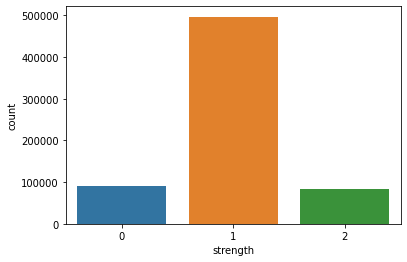

In [8]:
# Check distribution of target variable

sns.countplot(data['strength'])

Observation:

1. Majority of the password strength is 1 i.e., Average.
2. It is an imbalanced dataset

## Seperate dependent and independent variables

In [9]:
# Converting DataFrame to numpy array

password_tuple = np.array(data)

In [10]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
# Shuffling randomly for robustness in my model
import random

random.shuffle(password_tuple)

In [12]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [13]:
x

['kzde5577',
 'kzde5577',
 'kino3434',
 'visi7k1yr',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'visi7k1yr',
 'megzy123',
 'lamborghin1',
 'as326159',
 'asv5o9yu',
 'lamborghin1',
 '612035180tok',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'u6c8vhow',
 'asv5o9yu',
 'jerusalem393',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'intel1',
 'jytifok873',
 'kzde5577',
 '612035180tok',
 'sbl571017',
 'v1118714',
 'klara-tershina3H',
 'kzde5577',
 'faranumar91',
 'as326159',
 '6975038lp',
 '612035180tok',
 'klara-tershina3H',
 'gaymaids1',
 'schalke04',
 'schalke04',
 'czuodhj972',
 'czuodhj972',
 'idofo673',
 'fahad123',
 'memjan123',
 'czuodhj972',
 'memjan123',
 'WUt9IZzE0OQ7PkNE',
 'jerusalem393',
 'olmaz.',
 'TyWM72UNEex8Q8Y',
 'czuodhj972',
 'kino3434',
 'TyWM72UNEex8Q8Y',
 'yitbos77',
 'memjan123',
 'schalke04',
 'exitos2009',
 'juliel009',
 'jytifok873',
 'gaymaids1',
 'idofo673',
 'openup12',
 'gaymaids1',
 'intel1',
 'u6c8vhow',
 'matiofox08',
 'ok>bdk',
 'visi7k1yr',
 'intel1',
 'me

In [14]:
y

[1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,


## Create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character = []
    for char in inputs:
        character.append(char)
    return character

In [16]:
# Example to explain working of custom function i.e., tokenizer

word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

## Import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(tokenizer = word_divide_char)

### Apply TF-IDF vectorizer on data

In [19]:
X = vectorizer.fit_transform(x)

In [20]:
X.shape

(669639, 133)

After applying TF-IDF vectorizer we now have 128 unique features.

In [21]:
vectorizer.get_feature_names()

['\x01',
 '\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 '÷',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‡',
 '‹',
 '›',
 '™']

In [22]:
# Object of Sparse matrix
# the vector returned by tfidf vectorizer contains a large number of zero-valued elements
# sparse matrices only store non-zero elements. It storing non-zero elements with triples - (Row, Column, value). 
# By using sparse matrix we save a significant amount of memory and speed up the processing of that data

first_document_vector = X[0]
first_document_vector

<1x133 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
# Transforming sparse to dense representation

first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56693833],
        [0.        ],
        [0.59141273],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
# Create DataFrame with TF_IDF values as columns and feature names as index

df = pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591413
5,0.566938
z,0.335941
k,0.292038
d,0.285802
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


## Split Data into Train and Test set
    train ---> To learn the relationship within data. 
    test -->  To do predictions, and this testing data will be unseen to my model.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split into 80% Training data and 20% Testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape

(535711, 133)

# Model

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_lr = LogisticRegression(random_state=100, multi_class='multinomial')

In [30]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Prediction for specific custom data**


In [151]:
password = input('Enter which password you want to predict: ')

Enter which password you want to predict: asap121@16


In [150]:
def predict(model, password):
    # Convert str to numpy array
    password_pred = np.array([password])
    # apply TF-IDF vectorizer which has been fit with train data
    pred = vectorizer.transform(password_pred)
    # predict strength of the password
    y_predicted = model.predict(pred)
    # Print strength of the password
    if y_predicted == np.array([0]):
        print('Your password "{}" is weak.'.format(password))
    elif y_predicted == np.array([1]):
        print('Your password "{}" is Medium.'.format(password))
    else:
        print('Your password "{}" is Strong.'.format(password))

In [152]:
predict(model_lr, password)

Your password "asap121@16" is Medium.


**Checking Performance of your model using confusion_matrix and accuracy_score**

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [130]:
y_predicted = model_lr.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [131]:
cm = confusion_matrix(y_test,y_predicted)
print(cm)
print("\nAccuracy:",accuracy_score(y_test,y_predicted))

[[ 5479 12510    15]
 [ 3888 92964  2505]
 [   40  5106 11421]]

Accuracy: 0.820321366704498


In [133]:
class_acc = list(cm.diagonal()/cm.sum(axis=1))
print("Class wise accuracy: ")
for i in range(len(class_acc)):
    print(i, class_acc[i])

Class wise accuracy: 
0 0.3043212619417907
1 0.9356562698149099
2 0.6893825073942175


In [132]:
# Create report of yout model

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     18004
           1       0.84      0.94      0.89     99357
           2       0.82      0.69      0.75     16567

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



## Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [136]:
cm = confusion_matrix(y_test,y_predicted)
print(cm)
print("\nAccuracy:",accuracy_score(y_test,y_predicted))

[[16896  1106     2]
 [  275 98905   177]
 [   16   472 16079]]

Accuracy: 0.9847082014216594


In [138]:
class_acc = list(cm.diagonal()/cm.sum(axis=1))
print("Class wise accuracy: ")
for i in range(len(class_acc)):
    print(i, class_acc[i])

Class wise accuracy: 
0 0.938458120417685
1 0.9954507483116438
2 0.9705438522363735


In [137]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18004
           1       0.98      1.00      0.99     99357
           2       0.99      0.97      0.98     16567

    accuracy                           0.98    133928
   macro avg       0.99      0.97      0.98    133928
weighted avg       0.98      0.98      0.98    133928

